In [7]:
from __future__ import division, print_function, unicode_literals

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import re
import math
from docx import Document

# import packages for data visulatzation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# modeling routines from Scikit Learn packages for model develipment
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix , accuracy_score , classification_report, make_scorer,recall_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import regularizers

# obtain precision, recall, F1, and support metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# specify the set of classifiers being evaluated
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

import warnings
warnings.filterwarnings("ignore")
# set KMP_DUPLICATE_LIB_OK=TRUE      #  Windows
# set up randam seed
random_seed = 55
import tensorflow as tf
import torch
import platform

from sklearn.impute import KNNImputer
import pickle
df_input = pd.read_csv("E:/CNSI_project/demo_and_data_5.0/aim1_dataset_v2.2.csv")

# CNN

In [8]:
model_data_CNN = df_input.copy()
model_data_CNN = model_data_CNN.dropna(thresh=(model_data_CNN.shape[1]-1)*0.4, axis=0)
model_data_CNN

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,culture_old,C_LeukocyteCount,culture
0,NaN,NaN,0.7,92.0,NaN,NaN,NaN,3.7,144.0,11.7,...,NaN,100.0,NaN,0.0,NaN,NaN,NaN,0,1.00,0
1,NaN,3.6,0.6,95.0,NaN,NaN,187.0,3.7,137.0,12.6,...,NaN,43.0,2.0,17.0,NaN,NaN,NaN,0,3.76,0
2,NaN,2.6,1.2,76.0,NaN,NaN,NaN,4.9,137.0,9.7,...,NaN,41.0,49.0,10.0,16.0,13.0,2.0,0,10.00,0
3,NaN,NaN,0.8,105.0,NaN,NaN,NaN,3.9,142.0,15.3,...,NaN,62.0,NaN,0.0,NaN,NaN,NaN,0,1.00,0
4,NaN,4.9,1.0,111.0,12.0,2.0,NaN,4.6,128.0,8.4,...,45.3,96.0,NaN,1.0,19.0,9.0,3.0,0,142.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,NaN,NaN,0.8,155.0,NaN,NaN,NaN,3.6,137.0,11.6,...,NaN,0.0,NaN,100.0,NaN,NaN,NaN,0,18600.00,1
9257,NaN,NaN,0.7,140.0,NaN,NaN,180.0,3.7,140.0,13.0,...,NaN,1.0,NaN,90.0,NaN,NaN,NaN,0,7800.00,1
9258,NaN,2.3,0.7,53.0,NaN,NaN,NaN,3.8,135.0,10.7,...,NaN,88.0,NaN,8.0,NaN,NaN,NaN,0,3.00,0
9259,99.0,3.4,0.8,87.0,8.0,5.0,453.0,3.9,145.0,11.0,...,53.9,55.0,NaN,9.0,NaN,NaN,NaN,0,0.00,0


In [9]:
df_train, df_test = train_test_split(model_data_CNN, test_size=0.2, random_state = random_seed, stratify=model_data_CNN['culture_old'])

In [10]:
df_train = df_train.drop(columns=['culture_old'], axis=1)
df_test = df_test.drop(columns=['culture_old'], axis=1)
df_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,culture
5692,NaN,NaN,1.0,101.0,NaN,NaN,NaN,4.0,139.0,14.9,...,NaN,NaN,84.0,NaN,0.0,NaN,NaN,NaN,2.00,0
4400,114.0,3.9,0.9,NaN,NaN,NaN,331.0,NaN,NaN,13.2,...,NaN,NaN,54.0,NaN,1.0,NaN,NaN,NaN,2.00,0
4345,85.0,3.8,0.5,104.0,NaN,NaN,NaN,3.3,140.0,9.6,...,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1.02,0
8376,NaN,4.6,1.0,98.0,40.0,0.0,NaN,4.7,140.0,13.3,...,0.3,41.4,63.0,NaN,3.0,NaN,NaN,NaN,2.00,0
3930,NaN,NaN,1.7,99.0,25.0,2.0,NaN,4.2,139.0,14.3,...,0.5,42.2,0.0,NaN,0.0,NaN,NaN,NaN,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,NaN,NaN,2.1,91.0,NaN,NaN,NaN,4.8,140.0,9.8,...,NaN,NaN,65.0,35.0,0.0,NaN,NaN,NaN,3.00,1
2017,170.0,4.1,1.3,96.0,NaN,NaN,277.0,3.4,145.0,10.6,...,NaN,NaN,39.0,NaN,50.0,NaN,NaN,NaN,3.00,0
1174,NaN,4.4,0.7,105.0,446.0,0.0,NaN,7.3,138.0,13.2,...,0.4,41.9,71.0,NaN,3.0,18.0,2.0,2.0,0.00,0
1435,NaN,NaN,0.6,113.0,9.0,1.0,NaN,3.7,137.0,14.5,...,NaN,43.5,91.0,3.0,0.0,16.0,2.0,2.0,115.00,0


In [11]:
columns1 = df_train.columns
index1 = df_train.index
columns2 = df_test.columns
index2 = df_test.index

imputer = KNNImputer(n_neighbors=5, weights='distance')
df_train = imputer.fit_transform(df_train)
df_test = imputer.transform(df_test)

# change to DataFrame
df_train = pd.DataFrame(df_train, columns=columns1, index=index1)
df_train['culture'] = df_train['culture'].astype(np.int16)
df_test = pd.DataFrame(df_test, columns=columns2, index=index2)
df_test['culture'] = df_test['culture'].astype(np.int16)

In [12]:
X_train = df_train.iloc[:,:-1]
X_test = df_test.iloc[:,:-1]
y_train = df_train.iloc[:,-1:]
y_test = df_test.iloc[:,-1:]

In [13]:
# StandardScaler normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [14]:
# load model
from tensorflow.keras.models import load_model
model = load_model('E:/CNSI_project/demo_and_data_5.0/models_v2.2/aim1/Aim1_1dCNN.h5')

In [15]:
y_predict = model.predict(X_test)

58/58 [==============================] - 4s 3ms/step


In [16]:
y_test_cnn = y_test.copy()
y_predict_cnn = y_predict.copy()

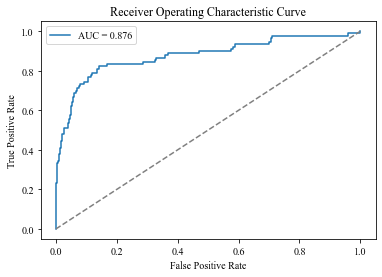

In [17]:
# Calculate AUC score and plot ROC curve
from sklearn.metrics import roc_curve, auc,roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test_cnn, y_predict_cnn[:,1])
auc = roc_auc_score(y_test_cnn, y_predict_cnn[:,1])

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

# DNN

In [18]:
model_data_DNN = df_input.copy()
model_data_DNN = model_data_DNN.dropna(thresh=(model_data_DNN.shape[1]-1)*0.4, axis=0)

In [19]:
df_train, df_test = train_test_split(model_data_CNN, test_size=0.2, random_state = random_seed, stratify=model_data_CNN['culture_old'])

In [20]:
df_train = df_train.drop(columns=['culture_old'], axis=1)
df_test = df_test.drop(columns=['culture_old'], axis=1)
df_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,culture
5692,NaN,NaN,1.0,101.0,NaN,NaN,NaN,4.0,139.0,14.9,...,NaN,NaN,84.0,NaN,0.0,NaN,NaN,NaN,2.00,0
4400,114.0,3.9,0.9,NaN,NaN,NaN,331.0,NaN,NaN,13.2,...,NaN,NaN,54.0,NaN,1.0,NaN,NaN,NaN,2.00,0
4345,85.0,3.8,0.5,104.0,NaN,NaN,NaN,3.3,140.0,9.6,...,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1.02,0
8376,NaN,4.6,1.0,98.0,40.0,0.0,NaN,4.7,140.0,13.3,...,0.3,41.4,63.0,NaN,3.0,NaN,NaN,NaN,2.00,0
3930,NaN,NaN,1.7,99.0,25.0,2.0,NaN,4.2,139.0,14.3,...,0.5,42.2,0.0,NaN,0.0,NaN,NaN,NaN,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,NaN,NaN,2.1,91.0,NaN,NaN,NaN,4.8,140.0,9.8,...,NaN,NaN,65.0,35.0,0.0,NaN,NaN,NaN,3.00,1
2017,170.0,4.1,1.3,96.0,NaN,NaN,277.0,3.4,145.0,10.6,...,NaN,NaN,39.0,NaN,50.0,NaN,NaN,NaN,3.00,0
1174,NaN,4.4,0.7,105.0,446.0,0.0,NaN,7.3,138.0,13.2,...,0.4,41.9,71.0,NaN,3.0,18.0,2.0,2.0,0.00,0
1435,NaN,NaN,0.6,113.0,9.0,1.0,NaN,3.7,137.0,14.5,...,NaN,43.5,91.0,3.0,0.0,16.0,2.0,2.0,115.00,0


In [21]:
columns1 = df_train.columns
index1 = df_train.index
columns2 = df_test.columns
index2 = df_test.index

imputer = KNNImputer(n_neighbors=5, weights='distance')
df_train = imputer.fit_transform(df_train)
df_test = imputer.transform(df_test)
# change to DataFrame
df_train = pd.DataFrame(df_train, columns=columns1, index=index1)
df_train['culture'] = df_train['culture'].astype(np.int16)
df_test = pd.DataFrame(df_test, columns=columns2, index=index2)
df_test['culture'] = df_test['culture'].astype(np.int16)

In [22]:
X_train = df_train.iloc[:,:-1]
X_test = df_test.iloc[:,:-1]
y_train = df_train.iloc[:,-1:]
y_test = df_test.iloc[:,-1:]

In [23]:
# method 2
# StandardScaler normalization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# load model
from tensorflow.keras.models import load_model
model = load_model('E:/CNSI_project/demo_and_data_5.0/models_v2.2/aim1/Aim1_FCN.h5')

In [25]:
y_predict = model.predict(X_test)

58/58 [==============================] - 0s 3ms/step


In [26]:
y_test_dnn = y_test.copy()
y_predict_dnn = y_predict.copy()

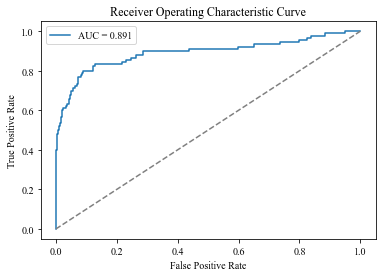

In [27]:
# Calculate AUC score and plot ROC curve
from sklearn.metrics import roc_curve, auc,roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test_dnn, y_predict_dnn[:,1])
auc = roc_auc_score(y_test_dnn, y_predict_dnn[:,1])

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

# RF

In [43]:
model_data_RF = df_input.copy()
model_data_RF = model_data_RF.dropna(thresh=(model_data_RF.shape[1]-1)*0.4, axis=0)

In [44]:
df_train, df_test = train_test_split(model_data_CNN, test_size=0.2, random_state = random_seed, stratify=model_data_CNN['culture'])

In [45]:
df_train = df_train.drop(columns=['culture_old'], axis=1)
df_test = df_test.drop(columns=['culture_old'], axis=1)
df_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,culture
5161,NaN,NaN,0.5,102.0,3.0,1.0,NaN,4.0,142.0,10.4,...,NaN,66.2,45.0,NaN,37.0,16.0,0.0,3.0,2.00,0
3039,41.0,NaN,0.6,296.0,8.0,1.0,NaN,3.5,138.0,12.1,...,NaN,42.9,8.0,NaN,90.0,18.0,0.0,2.0,152.51,0
1241,NaN,NaN,1.0,89.0,8.0,1.0,NaN,4.2,146.0,14.7,...,NaN,48.0,13.0,NaN,65.0,16.0,4.0,2.0,5.00,0
4588,488.0,3.2,0.6,96.0,16.0,0.0,NaN,4.0,142.0,10.6,...,0.5,42.5,78.0,NaN,0.0,NaN,NaN,NaN,4.00,0
5002,NaN,NaN,0.8,118.0,NaN,NaN,201.0,4.8,134.0,10.9,...,NaN,NaN,77.0,NaN,0.0,NaN,NaN,NaN,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,101.0,NaN,0.5,139.0,NaN,NaN,NaN,5.4,141.0,8.4,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.00,0
6744,118.0,2.8,2.1,119.0,NaN,NaN,NaN,3.5,140.0,9.3,...,NaN,NaN,37.0,NaN,23.0,NaN,NaN,NaN,1.00,0
3350,NaN,NaN,0.9,90.0,1.0,2.0,NaN,4.4,138.0,12.3,...,0.4,43.4,91.0,NaN,1.0,NaN,NaN,NaN,8.24,0
7565,NaN,3.4,0.9,110.0,NaN,NaN,231.0,4.4,137.0,11.4,...,NaN,NaN,40.0,NaN,0.0,NaN,NaN,NaN,1.00,0


In [46]:
columns1 = df_train.columns
index1 = df_train.index
columns2 = df_test.columns
index2 = df_test.index

imputer = KNNImputer(n_neighbors=5, weights='distance')
df_train = imputer.fit_transform(df_train)
df_test = imputer.transform(df_test)

# change to DataFrame
df_train = pd.DataFrame(df_train, columns=columns1, index=index1)
df_train['culture'] = df_train['culture'].astype(np.int16)
df_test = pd.DataFrame(df_test, columns=columns2, index=index2)
df_test['culture'] = df_test['culture'].astype(np.int16)

In [47]:
aaa = 1
if aaa < 100:
    data_X, data_y = df_train.iloc[:,:-1], df_train.iloc[:,-1:]

    from imblearn.over_sampling import SMOTE
    from collections import Counter 

    from imblearn.under_sampling import RandomUnderSampler
    proportion = 1/aaa
    rus = RandomUnderSampler(sampling_strategy=proportion, random_state=random_seed)  # 
    data_X, data_y = rus.fit_resample(data_X, data_y)

    df_train = shuffle(pd.concat([data_X, data_y], axis=1), random_state=random_seed)

In [48]:
enc_label = OneHotEncoder(categories=[[0,1],])
transformed_label = enc_label.fit_transform(df_train.iloc[:,[-1]]).toarray()
transformed_label = pd.DataFrame(transformed_label, columns=['Label_CultureN','Label_CultureP'], index=df_train.index)
df_train = df_train.drop(['culture'], axis=1)
df_train = pd.concat([df_train,transformed_label], axis=1)

In [49]:
# transform the test dataset
transformed_label = enc_label.transform(df_test.iloc[:,[-1]]).toarray()
transformed_label = pd.DataFrame(transformed_label, columns=['Label_CultureN','Label_CultureP'], index=df_test.index)
df_test = df_test.drop(['culture'], axis=1)
df_test = pd.concat([df_test,transformed_label], axis=1)

In [50]:
# assign columns into predictors and labels
predictor_list = list(df_train.columns)[:-2]
print(predictor_list,"\n")
label1_list = list(df_train.columns)[-2:]
print(label1_list)

['B_pO2', 'B_Albumin', 'B_Creatinine', 'B_Glucose', 'B_H', 'B_I', 'B_LactateDehydrogenase', 'B_Potassium', 'B_Sodium', 'B_Hemoglobin', 'B_lymphocytes', 'B_MCHC', 'B_MonocytesPercentage', 'B_Platelet', 'B_PTT', 'C_Glucose', 'C_Protein', 'B_MonocyteCount', 'B_ImmatureGranulocytes', 'B_RDW-SD', 'C_Lymphs', 'C_Macrophage', 'C_Polys', 'resprate', 'pain', 'acuity', 'C_LeukocyteCount'] 

['Label_CultureN', 'Label_CultureP']


In [51]:
# generate X subsets for Modelling 
X_train = df_train.filter(predictor_list, axis = 1)
X_test = df_test.filter(predictor_list, axis = 1)

In [52]:
# generate Y subsets for Modelling 
y1_train = df_train.filter(label1_list)
y1_test = df_test.filter(label1_list)

In [53]:
# upload the model
import joblib
best_random = joblib.load('E:/CNSI_project/demo_and_data_5.0/models_v2.2/aim1/Aim1_RF.m')

In [54]:
rf_model = best_random

In [55]:
y1_predict = rf_model.predict_proba(X_test)[1]

In [56]:
y_test_rf = y1_test.copy()
y_predict_rf = y1_predict.copy()

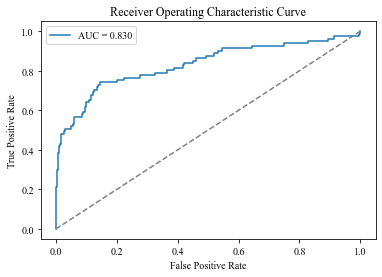

In [57]:
# Calculate AUC score and plot ROC curve
from sklearn.metrics import roc_curve, auc,roc_auc_score

# fpr, tpr, thresholds = roc_curve(label_true.ravel(), label_predict.ravel())
# auc = auc(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_test_rf.values[:,1], y_predict_rf[:,1])
auc = roc_auc_score(y_test_rf.values[:,1], y_predict_rf[:,1])

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

# All

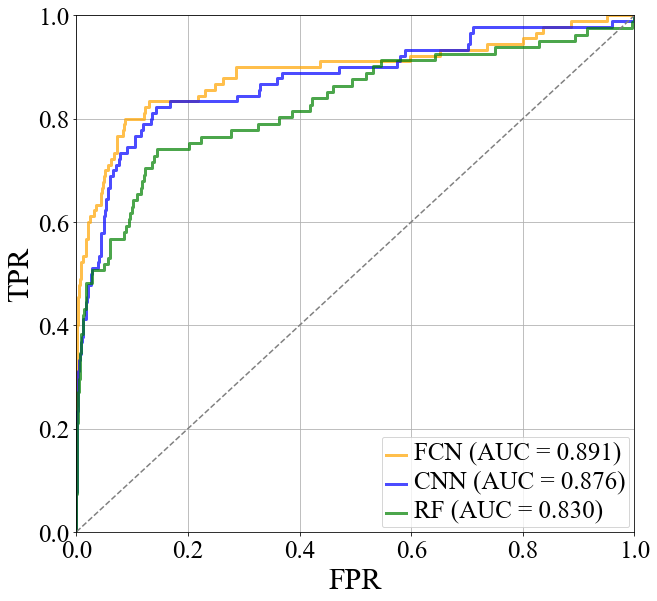

In [59]:
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_cnn, y_predict_cnn[:, 1])
auc_cnn = roc_auc_score(y_test_cnn, y_predict_cnn[:, 1])

fpr_dnn, tpr_dnn, _ = roc_curve(y_test_dnn, y_predict_dnn[:, 1])
auc_dnn = roc_auc_score(y_test_dnn, y_predict_dnn[:, 1])

fpr_rf, tpr_rf, _ = roc_curve(y_test_rf.values[:,1], y_predict_rf[:,1])
auc_rf = roc_auc_score(y_test_rf.values[:,1], y_predict_rf[:,1])

plt.figure(figsize=(10, 9.5))
plt.plot(fpr_dnn, tpr_dnn, color='orange', label=f'FCN (AUC = {auc_dnn:.3f})', linewidth=3, alpha=0.7)
plt.plot(fpr_cnn, tpr_cnn, color='blue', label=f'CNN (AUC = {auc_cnn:.3f})', linewidth=3, alpha=0.7)
plt.plot(fpr_rf, tpr_rf, color='green', label=f'RF (AUC = {auc_rf:.3f})', linewidth=3, alpha=0.7)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('FPR', fontsize=30, fontname='Times New Roman')  # False Positive Rate
plt.ylabel('TPR', fontsize=30, fontname='Times New Roman')    # True Positive Rate
# plt.title('ROC Curve of 3 Models', fontsize=30, fontname='Times New Roman')

legend = plt.legend(loc='lower right')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(25)
    
plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=25, fontname='Times New Roman')
plt.yticks(fontsize=25, fontname='Times New Roman')

path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim1", "auc_newlabel.tif")
plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()